<a href="https://colab.research.google.com/github/Rsorianoclever/taller_abierto_29_7_22/blob/main/MB_sintetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [9]:
dx,dy,dz = 10,10,10

In [10]:
x_range = np.arange(300000, 300100,dx)
y_range = np.arange(8000000, 8000100,dy)
z_range = np.arange(4500, 4600,dz)

In [11]:
x, y, z = np.meshgrid(x_range, y_range, z_range)

In [12]:
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = z.flatten()

In [13]:
domain_values = np.random.choice(['a', 'b', 'c'], size=x_flat.shape)
density = np.random.uniform(2.7, 5.2, size=x_flat.shape)

In [14]:
from scipy.stats import weibull_min
w_dist = weibull_min(3.861, scale=20.34)
Fe = w_dist.rvs(size=x_flat.shape)
l_dist = np.random.lognormal(mean=-3.541, sigma=1.235, size=x_flat.shape)
Pb = np.clip(l_dist, 0, 1.78)
Zn = np.random.gamma(shape=3.387, scale=1/0.667, size=x_flat.shape)
Cu = np.random.gamma(shape=1.018, scale=1/4.1, size=x_flat.shape)
l2_dist = np.random.lognormal(mean=-1.084, sigma=1.220, size=x_flat.shape)
Ag_OPT= np.clip(l2_dist, 0, 6)
rescat= np.random.choice(['1','2','3'], size=x_flat.shape)

In [15]:
data = pd.DataFrame({'x':x_flat,'y':y_flat,'z':z_flat,'domain':domain_values,'density':density,'Fe':Fe,'Pb':Pb,'Zn':Zn,'Cu':Cu,'Ag_OPT':Ag_OPT,'Rescat':rescat})
data

,x,y,z,domain,density,Fe,Pb,Zn,Cu,Ag_OPT,Rescat
0,300000,8000000,4500,a,3.303324,22.349489,0.097705,4.711944,0.143979,0.156743,2
1,300000,8000000,4510,a,4.893772,15.096615,0.037014,2.162233,0.311167,0.412395,2
2,300000,8000000,4520,b,3.011563,25.321530,0.115951,6.333296,0.015351,0.152784,1
3,300000,8000000,4530,b,3.607723,18.660145,0.037507,8.911607,0.290866,0.365260,2
4,300000,8000000,4540,c,3.087752,21.542012,0.033856,2.986194,0.236780,0.277205,1
...,...,...,...,...,...,...,...,...,...,...,...
995,300090,8000090,4550,a,3.716261,23.010666,0.056644,1.226481,0.087541,0.051857,3
996,300090,8000090,4560,c,3.972438,11.986671,0.011239,1.646298,0.231985,2.510955,2
997,300090,8000090,4570,c,3.809810,31.547440,0.385883,4.457110,0.018876,0.224692,2
998,300090,8000090,4580,c,4.085902,19.964830,0.049481,0.933482,0.192113,0.988007,2


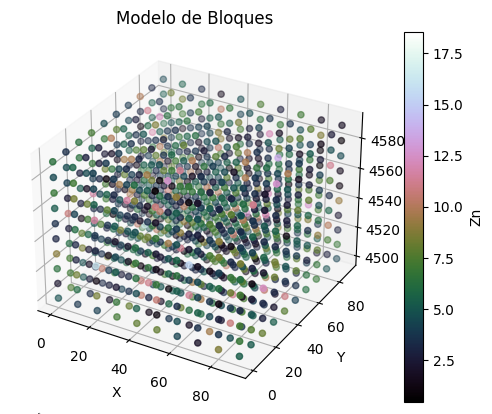

In [22]:
import matplotlib.pyplot as plt

# Crear una figura y un eje tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los bloques con coordenadas x, y, z y colores basados en "Ag_OPT"
scatter = ax.scatter(data['x'], data['y'], data['z'], c=data['Zn'], cmap='cubehelix')

# Configurar etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Modelo de Bloques')

# Agregar una barra de colores como leyenda para "Ag_OPT"
cbar = fig.colorbar(scatter)
cbar.set_label('Zn')

# Mostrar el gráfico
plt.show()
